C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


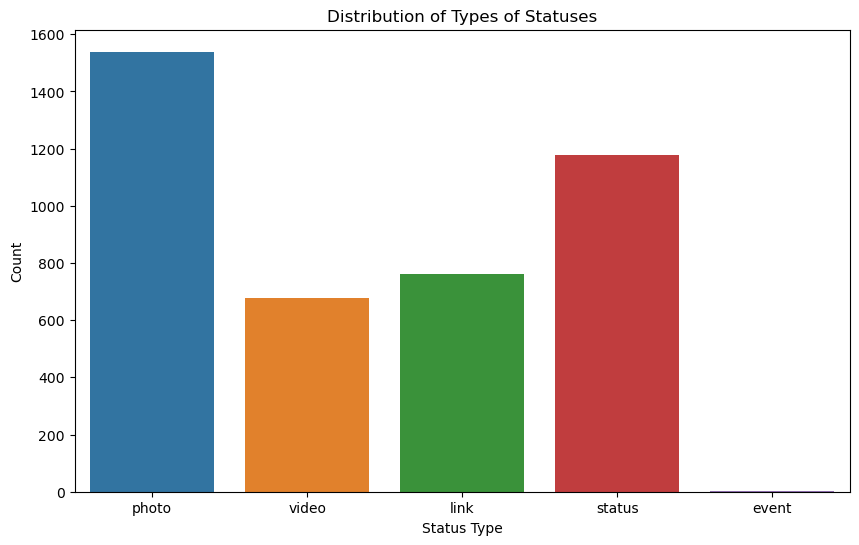

<Figure size 1200x800 with 0 Axes>

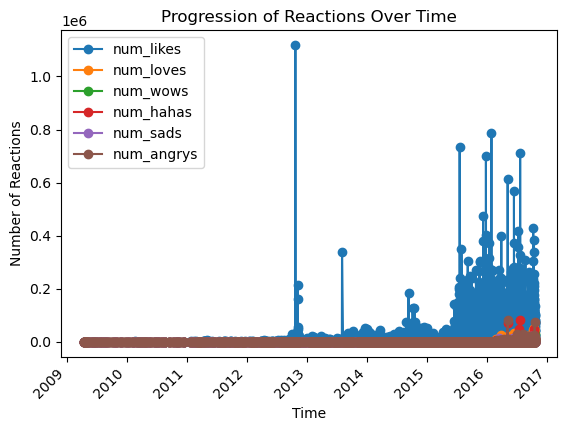

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Donald Trumps Facebook Statuses (1).csv")

# Plot distribution of types of statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='status_type', data=df)
plt.title('Distribution of Types of Statuses')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

# Plot progression of reactions over time
plt.figure(figsize=(12, 8))
df['status_published'] = pd.to_datetime(df['status_published'])
df.set_index('status_published', inplace=True)
df[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].plot(marker='o')
plt.title('Progression of Reactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45)
plt.show()


In [5]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [9]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
from gensim.models import LdaModel
from textblob import TextBlob

# Load the dataset
# Assuming df is already loaded with the Facebook status messages

# Tokenize and preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

df = df.dropna(subset=['status_message'])
df['tokens'] = df['status_message'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Extract top topics
top_topics = lda_model.print_topics()

# Analyze sentiment
df['sentiment'] = df['status_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Top reactions
top_reactions = ['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
top_reactions_counts = df[top_reactions].sum()

# Top themes that generated a lot of shares
top_shares_topics = df.sort_values(by='num_shares', ascending=False).head(10)['tokens']

# Top themes that generated a lot of num_reactions
top_reactions_topics = df.sort_values(by='num_reactions', ascending=False).head(10)['tokens']


In [10]:
# Print top topics
print("Top Topics:")
for topic in top_topics:
    print(topic)

# Print sentiment analysis
print("\nSentiment Analysis:")
print("Mean Sentiment Polarity:", df['sentiment'].mean())

# Print top reactions
print("\nTop Reactions:")
print(top_reactions_counts)

# Print top themes that generated a lot of shares
print("\nTop Themes for Shares:")
for idx, tokens in enumerate(top_shares_topics, 1):
    print(f"Theme {idx}: {' '.join(tokens)}")

# Print top themes that generated a lot of num_reactions
print("\nTop Themes for Number of Reactions:")
for idx, tokens in enumerate(top_reactions_topics, 1):
    print(f"Theme {idx}: {' '.join(tokens)}")

    
    

Top Topics:
(0, '0.013*"obama" + 0.008*"hillary" + 0.007*"president" + 0.007*"america" + 0.007*"clinton" + 0.007*"debate" + 0.006*"trump" + 0.006*"people" + 0.006*"thank" + 0.006*"going"')
(1, '0.033*"trump" + 0.020*"america" + 0.016*"great" + 0.011*"make" + 0.009*"president" + 0.007*"thank" + 0.005*"people" + 0.005*"get" + 0.005*"year" + 0.005*"let"')
(2, '0.023*"trump" + 0.020*"great" + 0.012*"america" + 0.011*"http" + 0.009*"country" + 0.009*"make" + 0.008*"donald" + 0.007*"time" + 0.007*"one" + 0.007*"new"')
(3, '0.022*"golf" + 0.019*"trump" + 0.013*"great" + 0.012*"america" + 0.009*"hillary" + 0.008*"make" + 0.007*"link" + 0.007*"course" + 0.007*"going" + 0.006*"club"')
(4, '0.019*"trump" + 0.011*"watch" + 0.009*"america" + 0.008*"make" + 0.008*"people" + 0.007*"new" + 0.007*"great" + 0.006*"country" + 0.006*"job" + 0.006*"live"')
(5, '0.012*"clinton" + 0.012*"hillary" + 0.008*"trump" + 0.007*"people" + 0.006*"would" + 0.006*"president" + 0.006*"american" + 0.006*"time" + 0.006*"q